# Stable Diffusion

In [1]:
!pip install genaibook

import torch
from diffusers import StableDiffusionPipeline

from genaibook.core import get_device
device = get_device()

pipe = StableDiffusionPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    variant="fp16",
).to(device)

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/69.1 MB ? eta -:--:--
   -- ------------------------------------- 5.0/69.1 MB 25.1 MB/s eta 0:00:03
   ------ --------------------------------- 11.3/69.1 MB 27.1 MB/s eta 0:00:03
   ---------- ----------------------------- 17.6/69.1 MB 27.7 MB/s eta 0:00:02
   ------------- -------------------------- 23.1/69.1 MB 27.0 MB/s eta 0:00:02
   ---------------- ----------------------- 29.1/69.1 MB 27.5 MB/s eta 0:00:02
   ------------------- -------------------- 34.3/69.1 MB 26.9 MB/s eta 0:00:02
   ---------------------- ----------------- 39.1/69.1 MB 26.4 MB/s eta 0:00:02
   ------------------------- -------------- 43.8/69.1 MB 26.0 MB/s eta 0:00:01
   ---------------------------- ----------- 49.0/69.1 MB 25.8 MB/s eta 0:00:01
   ------------------------------- -------- 54.0/69.1 MB 25.7 MB/s eta 0:00:01
   --------------------------------- ------ 58.5/69.1 MB 25.3 MB/s e

C:\Users\norri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.11it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.35it/s]


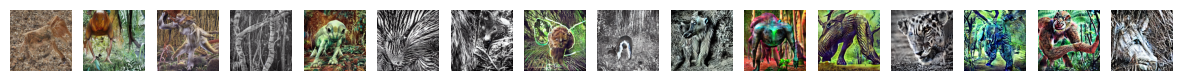

'C:\\Windows\\System32\\animals.zip'

In [3]:
import os
import random
import shutil
import numpy as np
from matplotlib import pyplot as plt

# Set the seed for reproducibility
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # For CUDA-enabled GPUs

randSeed = random.randrange(50)

set_seed(randSeed)

# Create an empty list to store the generated images
image_list = []

for i in range(16):
    result = pipe("A photograph of an imagined animal that belongs to an alien jungle. Taken from a real animal but heavily distorted until unrecognizable.",
                  num_inference_steps=10,
                  guidance_scale=i+1).images[0]
    image_list.append(result)  # Add the generated image to the list
    randSeed = random.randrange(50)

# Convert the list of images to a NumPy array
image_array = np.array(image_list)

# Create a directory to save the images
os.makedirs("images", exist_ok=True)

num_images = len(image_array)

# Plot and save the generated images
fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
for i, img in enumerate(image_array):
    axes[i].imshow(img)
    axes[i].axis("off")

    filename = f"images/animal_{i:02d}.png"
    plt.imsave(filename, img)  # Removed .numpy()

# Save the entire grid of images
plt.savefig("images/animal_grid.png")
plt.show()

# Create a zip archive containing the NPZ file
shutil.make_archive("animals", "zip", "images")